In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

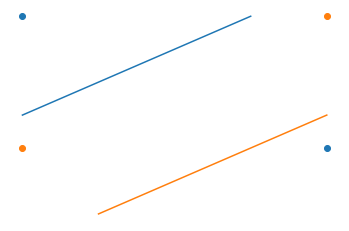

In [18]:
y = [0,1,1,0]
plt.axis('off')
plt.scatter([-1,1],[1,-1])
plt.scatter([-1,1],[-1,1],cmap='oranges')
plt.plot([-1,0.5],[-0.5,1])
plt.plot([-0.5,1],[-2,-0.5])
plt.show()

In [3]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('float_format','{:2f}'.format)

In [2]:
df = pd.read_csv("./train_ver2.csv")
df.head()

D:\code\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
# columns to be used as features #
feature_cols = ["ind_empleado","pais_residencia","sexo","age", "ind_nuevo", "antiguedad", "nomprov", "segmento"]
dtype_list = {'ind_cco_fin_ult1': 'float16', 'ind_deme_fin_ult1': 'float16', 'ind_aval_fin_ult1': 'float16', 'ind_valo_fin_ult1': 'float16', 'ind_reca_fin_ult1': 'float16', 'ind_ctju_fin_ult1': 'float16', 'ind_cder_fin_ult1': 'float16', 'ind_plan_fin_ult1': 'float16', 'ind_fond_fin_ult1': 'float16', 'ind_hip_fin_ult1': 'float16', 'ind_pres_fin_ult1': 'float16', 'ind_nomina_ult1': 'float16', 'ind_cno_fin_ult1': 'float16', 'ncodpers': 'int64', 'ind_ctpp_fin_ult1': 'float16', 'ind_ahor_fin_ult1': 'float16', 'ind_dela_fin_ult1': 'float16', 'ind_ecue_fin_ult1': 'float16', 'ind_nom_pens_ult1': 'float16', 'ind_recibo_ult1': 'float16', 'ind_deco_fin_ult1': 'float16', 'ind_tjcr_fin_ult1': 'float16', 'ind_ctop_fin_ult1': 'float16', 'ind_viv_fin_ult1': 'float16', 'ind_ctma_fin_ult1': 'float16'}
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1'] 

In [8]:
len(target_cols)

24

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, ensemble



if __name__ == "__main__":
	data_path = "../input/"
	train_file = data_path + "train_ver2.csv"
	test_file = data_path + "test_ver2.csv"
	train_size = 13647309
	nrows = 1000000 # change this value to read more rows from train

	start_index = train_size - nrows	
	for ind, col in enumerate(feature_cols):
		print(col)
		train = pd.read_csv(train_file, usecols=[col])
		test = pd.read_csv(test_file, usecols=[col])
		train.fillna(-99, inplace=True)
		test.fillna(-99, inplace=True)
		if train[col].dtype == "object":
			le = preprocessing.LabelEncoder()
			le.fit(list(train[col].values) + list(test[col].values))
			temp_train_X = le.transform(list(train[col].values)).reshape(-1,1)[start_index:,:]
			temp_test_X = le.transform(list(test[col].values)).reshape(-1,1)
		else:
			temp_train_X = np.array(train[col]).reshape(-1,1)[start_index:,:]
			temp_test_X = np.array(test[col]).reshape(-1,1)
		if ind == 0:
			train_X = temp_train_X.copy()
			test_X = temp_test_X.copy()
		else:
			train_X = np.hstack([train_X, temp_train_X])
			test_X = np.hstack([test_X, temp_test_X])
		print(train_X.shape, test_X.shape)
	del train
	del test

	train_y = pd.read_csv(train_file, usecols=['ncodpers']+target_cols, dtype=dtype_list)
	last_instance_df = train_y.drop_duplicates('ncodpers', keep='last')
	train_y = np.array(train_y.fillna(0)).astype('int')[start_index:,1:]
	print(train_X.shape, train_y.shape)
	print(test_X.shape)

	print("Running Model..")
	model = ensemble.RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=10, n_jobs=4, random_state=2016)
	model.fit(train_X, train_y)
	del train_X, train_y
	print("Predicting..")
	preds = np.array(model.predict_proba(test_X))[:,:,1].T
	del test_X
	
	print("Getting last instance dict..")
	last_instance_df = last_instance_df.fillna(0).astype('int')
	cust_dict = {}
	target_cols = np.array(target_cols)
	for ind, row in last_instance_df.iterrows():
	    cust = row['ncodpers']
	    used_products = set(target_cols[np.array(row[1:])==1])
	    cust_dict[cust] = used_products
	del last_instance_df

	print("Creating submission..")
	preds = np.argsort(preds, axis=1)
	preds = np.fliplr(preds)
	test_id = np.array(pd.read_csv(test_file, usecols=['ncodpers'])['ncodpers'])
	final_preds = []
	for ind, pred in enumerate(preds):
	    cust = test_id[ind]
	    top_products = target_cols[pred]
	    used_products = cust_dict.get(cust,[])
	    new_top_products = []
	    for product in top_products:
	        if product not in used_products:
	            new_top_products.append(product)
	        if len(new_top_products) == 7:
	            break
	    final_preds.append(" ".join(new_top_products))
	out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
	out_df.to_csv('sub_rf.csv', index=False)